# The Sparks Foundation

## Task : Prediction using Decision Tree Algorithm

#### *By : Akhil Namboodiri*

In [1]:
#Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
#Reading the dataset and displaying its first 5 records using head()

df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Printing the information of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#Printing the columns of the dataframe

df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
#Describing the dataframe

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#Determining the correlation among the variables

data=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']]
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


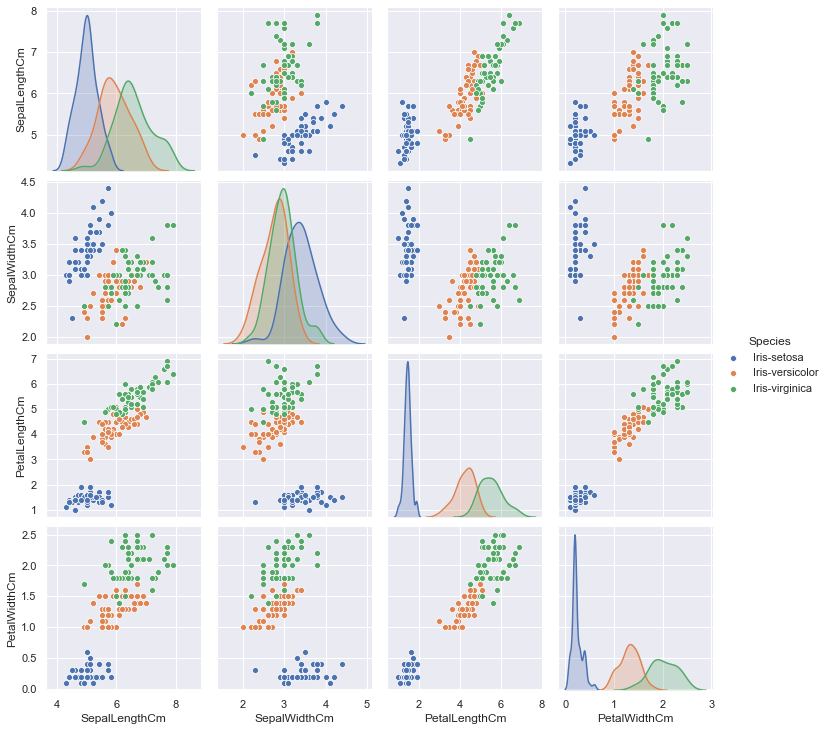

In [7]:
#Preparing a pairplot to visualize the data

sns.pairplot(data,hue='Species')

In [8]:
#Preparing the input features and target/labels for the model to predict

X=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=df['Species']

In [9]:
#Splitting the data into training and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
#Training a Decision tree model by importing DecisionTreeClassifier()

from sklearn.tree import DecisionTreeClassifier

In [11]:
#Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
#Making predictions using the test data

y_pred=dtree.predict(X_test)

In [13]:
#After making predictions evaluating the performance of the model by preparing a confusion matrix and classification report

from sklearn.metrics import confusion_matrix,classification_report

In [14]:
#Confusion Matrix

confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),index = ['Setosa', 'Versicolor','Virginica'], columns = ['Setosa', 'Versicolor','Virginica'])
confusion_mat

,Setosa,Versicolor,Virginica
Setosa,19,0,0
Versicolor,0,13,0
Virginica,0,0,13


In [15]:
#Classification Report

print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



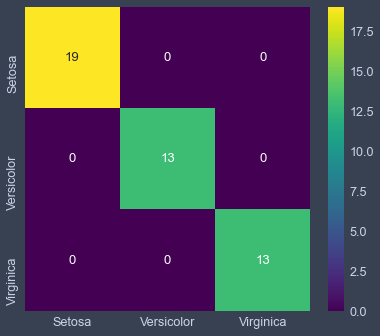

In [16]:
#Visualising the correlation among the data using heatmap

from jupyterthemes import jtplot
jtplot.style(theme='oceans16')
sns.heatmap(confusion_mat , cmap='viridis', annot=True, linecolor='r') 

In [17]:
#Visualising the Decision Tree formed

import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                                class_names='Species',
                                filled=True)
graph = graphviz.Source(dot_data, format="png")

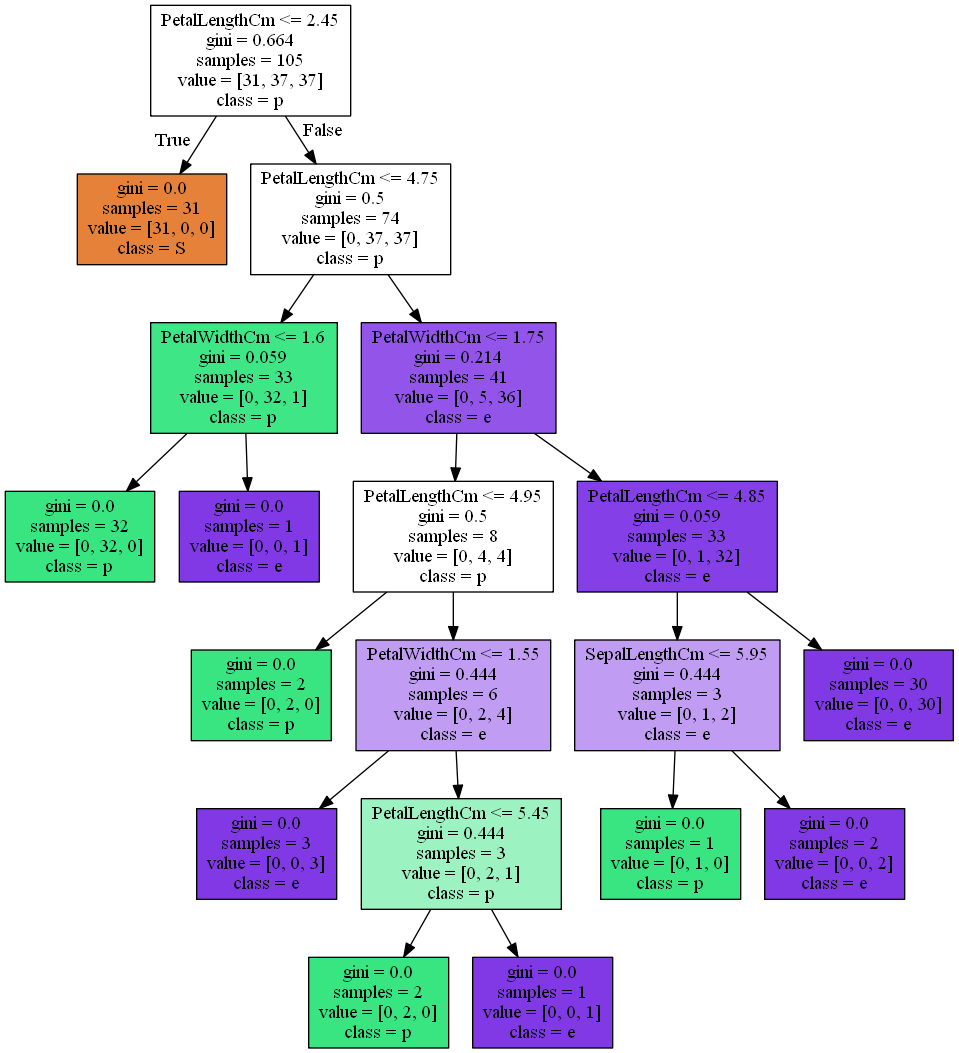

In [18]:
#Visualizing the graph

from graphviz import Source
from IPython.display import SVG
png_bytes = graph.pipe(format='png')
with open('dtree.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

In [19]:
# Giving input for predicting its class

sample_data=[[4.4,2.9,1.4,0.2],[5.5,2.4,3.7,1.0],[6.3,2.5,5.0,1.9]]
print('The input which are being given are:')
for i in sample_data:
    print('Sample',sample_data.index(i))
    print('\tSepal Length:',i[0])
    print('\tSepal Width:',i[1])
    print('\tPetal Length:',i[2])
    print('\tPetal Width:',i[3])

The input which are being given are:
Sample 0
	Sepal Length: 4.4
	Sepal Width: 2.9
	Petal Length: 1.4
	Petal Width: 0.2
Sample 1
	Sepal Length: 5.5
	Sepal Width: 2.4
	Petal Length: 3.7
	Petal Width: 1.0
Sample 2
	Sepal Length: 6.3
	Sepal Width: 2.5
	Petal Length: 5.0
	Petal Width: 1.9


In [20]:
# Creating a dataframe for the given input

df1=pd.DataFrame(data=sample_data,columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.4,2.9,1.4,0.2
1,5.5,2.4,3.7,1.0
2,6.3,2.5,5.0,1.9


In [21]:
# Predicting the classes for the provided input

result=dtree.predict(df1)
for i in range(len(result)):
    print('Predicted class for sample {} is {} '.format(i+1 , result[i]))

Predicted class for sample 1 is Iris-setosa 
Predicted class for sample 2 is Iris-versicolor 
Predicted class for sample 3 is Iris-virginica 


# Thank you